# Dynamic Systems

If you don't see Julia among the kernels: From the Julia promt, push `]`, then
```
add IJulia
```
The push backspace and
```
using IJulia
jupyterlab()
```

## First-order difference equations
$$
x_t = F_t(x_{t-1})
$$


### First-order linear difference equations


$$
x_t = a x_{t-1} + b
$$
Substract $b/(1-a)$:
$$
x_t - b/(1-a) = a x_{t-1} +b - b/(1-a) 
$$
$$
x_t - b/(1-a) = a (x_{t-1} - b/(1-a)) 
$$
$$
\tilde x_t = a \tilde x_{t-1}
$$
with $\tilde x_t = x_t-b/(1-a)$


Suppose $x_o = c$ and assume $b=0$
$$
x_t = ax_{t-1} = a^2 x_{t-2}=..
$$
$$
x_t = a^t c
$$

### Functions


In [2]:
function AR1(x, a, b)
    return a * x + b
end

AR1 (generic function with 1 method)

In [3]:
AR1(1.0, 0.99, 0.0)

0.99

### For loops

In [4]:
T = 20
x_lag = 2.5
a = 0.75
b = 1.0

for t = 1:T
    println(x_lag)
    x_current = AR1(x_lag, a, b)
    x_lag = x_current
end
println(x_current)

2.5
2.875
3.15625
3.3671875
3.525390625
3.64404296875
3.7330322265625
3.799774169921875
3.8498306274414062
3.8873729705810547
3.915529727935791
3.9366472959518433
3.9524854719638824
3.964364103972912
3.973273077979684
3.979954808484763
3.984966106363572
3.988724579772679
3.9915434348295094
3.993657576122132


UndefVarError: UndefVarError: x_current not defined

See the [docs on variable scope](https://docs.julialang.org/en/v1/manual/variables-and-scoping/#scope-of-variables), they are pretty complex.

# Exercise
> Write a for loop that prints the first 5 square numbers.

In [5]:
for t = 1:5
    println(t^2)
end

1
4
9
16
25


In [6]:
T = 5
for t = 1:T
    println(i^2)
    i = i + 1
end

UndefVarError: UndefVarError: i not defined

In [7]:
i

UndefVarError: UndefVarError: i not defined

### Types and multiple dispatch

In [8]:
function AR1(x::Float64, a::Float64, b::Float64)
    return a * x + b
end

AR1 (generic function with 2 methods)

### Vectors and N-dimensional arrays

In [9]:
X = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [10]:
Z = [1.0, 2.0, 3.0]

3-element Array{Float64,1}:
 1.0
 2.0
 3.0

In [11]:
typeof(2//3)

Rational{Int64}

In [12]:
typeof(2/3)

Float64

In [13]:
2//3 * 3

2//1

In [14]:
2/3 * 3

2.0

In [15]:
typeof(1.0 + 2im)

Complex{Float64}

In [16]:
(im)^2

-1 + 0im

In [17]:
sqrt(4.0)

2.0

In [18]:
sqrt(-1.0)

DomainError: DomainError with -1.0:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [19]:
sqrt(-1.0 + 0im)

0.0 + 1.0im

In [20]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [21]:
b_is_not_a_vector = [1 2]

1×2 Array{Int64,2}:
 1  2

In [22]:
c_is_a_vector = [1, 2]

2-element Array{Int64,1}:
 1
 2

In [23]:
eye = [1 0; 0 1]

2×2 Array{Int64,2}:
 1  0
 0  1

In [24]:
c_is_a_vector' * eye 

1×2 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 1  2

In [25]:
function AR1(x::Array{Float64, 1}, a::Float64, b::Float64)
    return a .* x .+ b
end

AR1 (generic function with 3 methods)

In [26]:
AR1(Z, 0.8, 0.0)

3-element Array{Float64,1}:
 0.8
 1.6
 2.4000000000000004

In [27]:
typeof(X)

Array{Int64,1}

In [28]:
function forecast_AR1!(x::Array{Float64, 1}, a::Float64)
    T = length(x)
    for t = 2:T
        x[t] = a * x[t-1]
    end
end

forecast_AR1! (generic function with 1 method)

In [29]:
X = ones(10)
forecast_AR1!(X, 0.7)
println(X)

[1.0, 0.7, 0.48999999999999994, 0.3429999999999999, 0.24009999999999992, 0.16806999999999994, 0.11764899999999995, 0.08235429999999996, 0.05764800999999997, 0.04035360699999998]


### 

In [30]:
using Plots

In [31]:
using Pkg
Pkg.add("Plots")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %[============>                            ]  28.9 %>         ]  75.7 %Fetching: [===================================>     ]  86.6 %

  Resolving package versions...
   Updating `~/Tresorit/teaching/courses/2020/ECBS-6001-Advanced-Macroeconomics/Project.toml`
 [no changes]
   Updating `~/Tresorit/teaching/courses/2020/ECBS-6001-Advanced-Macroeconomics/Manifest.toml`
 [no changes]


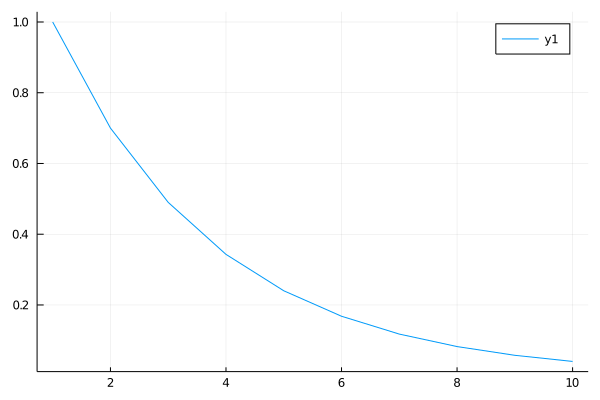

In [32]:
using Plots
plot(X)

In [33]:
A = [1 2 3 4; 2 4 6 8]

2×4 Array{Int64,2}:
 1  2  3  4
 2  4  6  8

In [34]:
X

10-element Array{Float64,1}:
 1.0
 0.7
 0.48999999999999994
 0.3429999999999999
 0.24009999999999992
 0.16806999999999994
 0.11764899999999995
 0.08235429999999996
 0.05764800999999997
 0.04035360699999998

## Plotting

In [17]:
Pkg.precompile()

Precompiling project...


In [15]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


# Exercise
> Plot the first 5 square numbers.

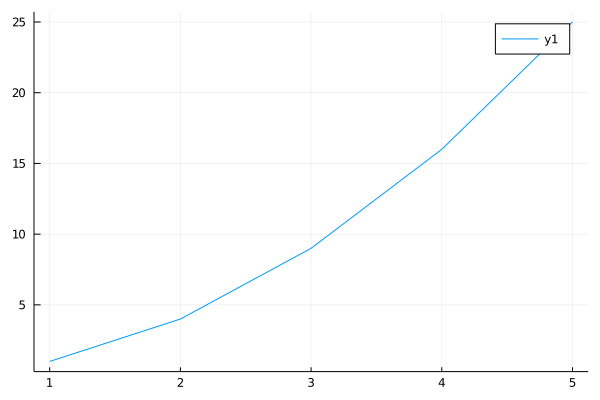

In [38]:
plot([1, 2, 3, 4, 5] .^ 2)

### Stability properties
Remember, for first-order difference equation
$$
x_t = a x_{t-1}
$$
Solution
$$
x_t = c a^t
$$
with $c$ pinned down by the boundary condition.

Stable when
$$
|a| < 1.
$$

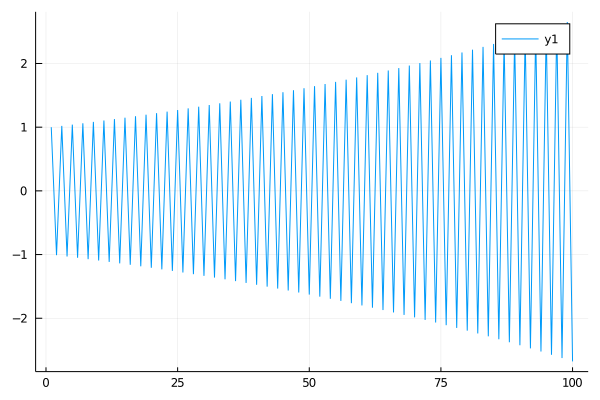

In [48]:
X = ones(100)
forecast_AR1!(X, -1.01)
plot(X)

### Second-order linear difference equations
$$
x_t = a_1 x_{t-1} + a_2 x_{t-1} + b
$$
Similarly, we can subtract $b/(1 - a_1 - a_2)$ so that the series converges to 0.

In [59]:
function forecast_AR2!(x::Vector{Float64}, a1::Float64, a2::Float64)
    T = length(x)
    for t = 3:T
        x[t] = a1 * x[t-1] + a2 * x[t-2]
    end
end

forecast_AR2! (generic function with 1 method)

In [61]:
Z = zeros(10)
Z[2] = 1.0
Z

10-element Array{Float64,1}:
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

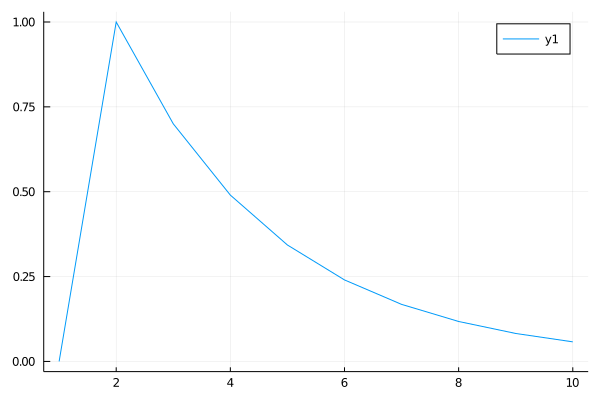

In [62]:
forecast_AR2!(Z, 0.7, 0.0)
plot(Z)

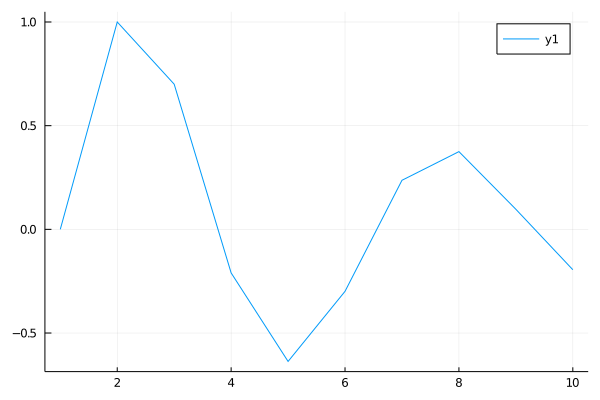

In [64]:
forecast_AR2!(Z, 0.7, -0.7)
plot(Z)

# Exercise
> Plot the solution for the following difference equation:
> $$ x_t = 1.6 x_{t-1} - 0.64 x_{t-2}$$

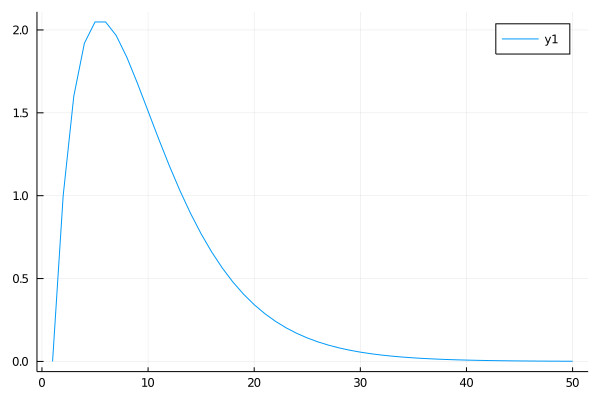

In [66]:
Z = zeros(50)
Z[2] = 1.0
forecast_AR2!(Z, 1.6, -0.64)
plot(Z)

### The lag operator
Let $Lx_t \equiv x_{t-1}$. By induction, $L^px_t = x_{t-p}$. We can write
$$
x_t = a_1 L x_t + a_2 L^2 x_t
$$
$$
(1 - a_1 L  - a_2 L^2) x_t = 0
$$


This is a linear operator:
$$ 
L(ax_t + b z_t) = aLx_t + b Lz_t
$$

We can decompose into
$$
(1 - \lambda_1 L) (1 - \lambda_2 L) x_t = 0
$$

such that
$$
\lambda_1\lambda_2 = -a_2
$$
and
$$
\lambda_1 +\lambda_2 = a_1
$$

We have to study the "roots" $\lambda_1$ and $\lambda_2$.

Recall for AR1:
$$
(1- aL)x_t = 0
$$
had the solution $x_t = c a^t$. If $x_{t1}$ is a solution to AR1 with $\lambda_1$, then $(1-\lambda_1 L)x_{t1} = 0$ for all $t$. Btw, $x_{t1} = c_1 \lambda_1^t$.
Then $x_{t1}$ and $x_{t2}$ are both solutions to AR2. The generic solution is
$$
x_t = c_1 \lambda_1^t + c_2 \lambda_2 ^t.
$$


In [80]:
function forecast_with_lambda!(x::Vector{Float64}, λ1::Complex, λ2::Complex)
    a1 = (λ1 + λ2)
    a2 = (- λ1 * λ2)
    T = length(x)
    for t = 3:T
        x[t] = a1 * x[t-1] + a2 * x[t-2]
    end
end

forecast_with_lambda! (generic function with 2 methods)

In [68]:
Z

50-element Array{Float64,1}:
 0.0
 1.0
 1.6
 1.9200000000000004
 2.048000000000001
 2.048000000000001
 1.966080000000001
 1.8350080000000013
 1.6777216000000015
 1.5099494400000018
 1.342177280000002
 1.1811160064000021
 1.0307921510400022
 ⋮
 0.009865364031216382
 0.00809998309931451
 0.006646139978924731
 0.005449834782718285
 0.004466206065837428
 0.003658035444400183
 0.0029944848289043388
 0.0024500330418308256
 0.002003582576430544
 0.0016377109755171427
 0.00133804471191188
 0.0010927365147280364

In [87]:
forecast_with_lambda!(Z, 0.8+0.1im, -0.5-0.1im)
plot(Z)

InexactError: InexactError: Float64(0.48000000000000004 + 0.13im)

> Note: not any pair of complex numbers work as these have to be roots of a quadratic equation. I will fix this for next class.

In [60]:
Complex(3, 4)

3 + 4im

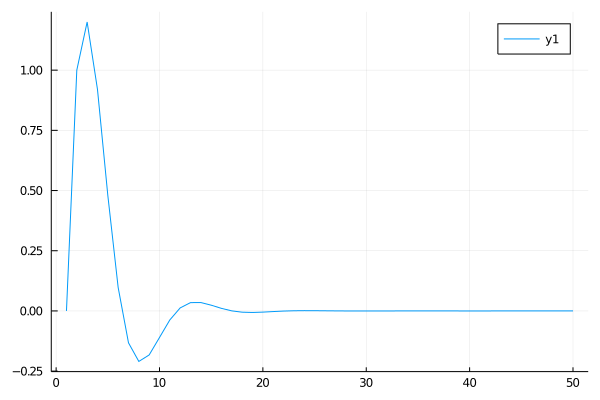

In [89]:
forecast_with_lambda!(Z, 0.6 + 0.4im, 0.6 - 0.4im)
plot(Z)

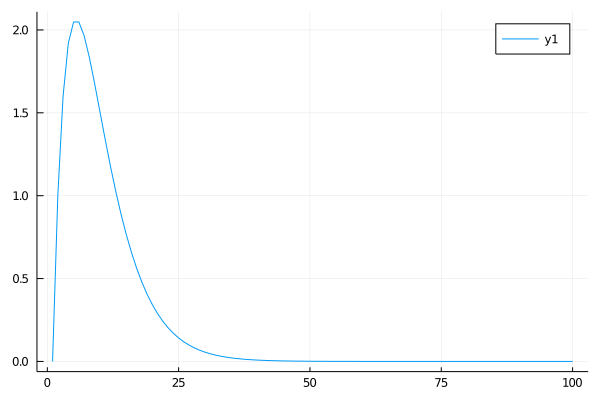

In [110]:
forecast_AR2_with_lambda!(Z, 0.8, 0.8)
plot(Z)

### Solution and stability properties
Take a linear homogeneous difference equation with order $p$. Let $\lambda_k$ be a root with multiplicity $m_k$. Then the solution is
$$
x_t = \sum_k (c_{k1} + c_{k2}t + ... + c_{km_k}t^{m_k}) \lambda_k^t.
$$
When $\lambda$ are real, these are smooth response functions. When $\lambda$ are complex, $x_{t}$ will oscillate

In [1]:
function forecast_with_common_root!(X::Vector{Float64}, λ::Real)
    # find constants fitting boundary condition
    c1 = X[1]
    c2 = X[2] / λ - c1

    T = length(X)
    t = map(Float64, collect(0:T-1))
    
    X .= (c1 .+ c2 .* t) .* λ.^t
end

forecast_with_common_root! (generic function with 1 method)

In [15]:
using Plots

In [16]:
forecast_with_common_root!(Z, 0.8)
plot!(Z)

UndefVarError: UndefVarError: Z not defined

# Exercise
> Write a function that verifies, for a given $\lambda=\lambda_1=\lambda_2$ that the solution of the difference equation is the same as the forecast.

## Two-dimensional linear systems
Overview of [Linear Algebra Library](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/)

$$
\begin{pmatrix} 
    x_{t1}  \\
    x_{t2} 
\end{pmatrix} 
=
\begin{bmatrix}
    a_{11} & a_{12} \\
    a_{21} & a_{22}
\end{bmatrix} 
\begin{pmatrix} 
    x_{t-1,1}  \\
    x_{t-1,2} 
\end{pmatrix} 
+
\begin{pmatrix} 
    b_{1}  \\
    b_{2} 
\end{pmatrix} 
$$

$$
\mathbf x_t =
\mathbf A
\mathbf x_{t-1}
+ \mathbf b
$$
Again, we will assume $\mathbf b = 0$.

Forecasting multiple periods,
$$
\mathbf x_t 
=
\mathbf A^2
\mathbf x_{t-2}
=
\mathbf A^t
\mathbf x_{0}.
$$

In [10]:
function forecast_ndim_AR1!(x::Array{Float64, 2}, A::Array{Float64, 2})
    # FIXME: use type for square matrix?
    
    # second dimension in rows
    # use tuple unpacking and throwaway assignment
    _, T = size(x)
    
    for t = 2:T
        # FIXME: make sure muliplication makes sense
        x[:, t] = A * x[:, t-1]
    end
end

forecast_ndim_AR1! (generic function with 1 method)

In [24]:
x = zeros(2, 30)
x[:, 1] = [1.0; 1.0]
x

2×30 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [25]:
A = [0.9 -0.1; 0.1 0.9]
A * x

2×30 Array{Float64,2}:
 0.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [26]:
using Plots

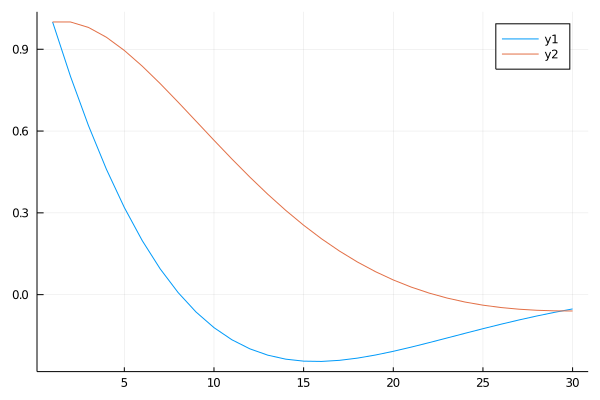

In [27]:
forecast_ndim_AR1!(x, A)
plot(x')

### Every system is first order
Take a second-order linear system,
$$
x_t = a_1 x_{t-1} + a_2 x_{t-2}.
$$
Introduce lagged $x$ as another state variable, and denote $\mathbf x_t=(x_t, x_{t-1})'$
$$
\mathbf x_t =
\begin{bmatrix}
a_1 & a_2 \\
1 & 0 
\end{bmatrix} \mathbf x_{t-1}
$$

### Eigenvalues and stability properties
Decompose $\mathbf A$ into its eigenvalues and eigenvectors,
$$
\mathbf A =
\mathbf Q
\mathbf \Lambda
\mathbf Q^{-1}
$$
with $\mathbf v_t = \mathbf Q^{-1} \mathbf x_t$, we have a system of independent difference equations
$$
\mathbf v_t 
=
\mathbf \Lambda
\mathbf v_{t-1}
$$
which we already know how to solve
$$
\mathbf v_t 
=
\mathbf \Lambda^t
\mathbf v_{0}
$$


In [30]:
A
using LinearAlgebra
λ = eigen(A).values
Q = eigen(A).vectors

2×2 Array{Complex{Float64},2}:
 0.707107-0.0im       0.707107+0.0im
      0.0+0.707107im       0.0-0.707107im

How can an eigenvector be complex?

In [31]:
λ

2-element Array{Complex{Float64},1}:
 0.9 - 0.1im
 0.9 + 0.1im

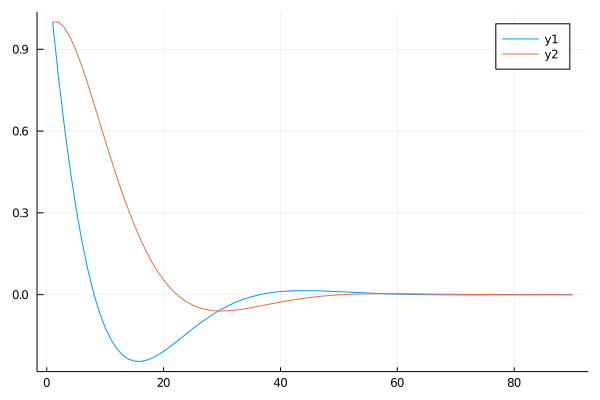

In [32]:
x = zeros(2, 90)
x[:, 1] = [1.0; 1.0]
forecast_ndim_AR1!(x, A)
plot(x')

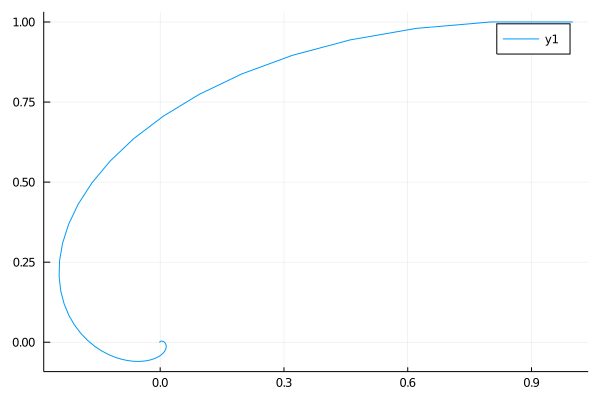

In [34]:
plot(x[1,:], x[2,:])